# Reddit News Sentiment Analysis and Predictions 

This project focuses on text processing and using sentiment analysis to determine the opinion factor of a given text by utilizing text processing techniques and data mining methods. 

The goal is to determine the sentiment polarity of a given news headline and classify it into different factions depending upon how the news is categorized on the basis of the sentiments.

The choice of algorithms for the prediction phase will be focused towards a classification perspective, with the algorithms being SVM, Random Forests and Decision Trees. 

In [1]:
import pandas as pd 
import numpy as np 
from textblob import TextBlob
import seaborn as sns
import sklearn as sk 
import nltk 
import matplotlib.pyplot as plt 

In [2]:
#Importing the dataframe 

df = pd.read_csv('C:\\Users\\SI-SaureyjVerma\\Desktop\\reddit.csv')

In [3]:
df.head()

,Unnamed: 0,Title,Comments,Score,Time
0,0,"Two weeks before his inauguration, Donald J. T...",18447,189354,1.531966e+09
1,1,Scientist Stephen Hawking has died aged 76,6971,188179,1.520999e+09
2,2,F.C.C. Announces Plan to Repeal Net Neutrality,10933,178000,1.511283e+09
3,3,Report: Stan Lee dead at 95 - Story,6445,155787,1.542048e+09
4,4,Arizona Senator John McCain has passed away at...,11720,154789,1.535243e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 5 columns):
Unnamed: 0    1993 non-null int64
Title         1993 non-null object
Comments      1993 non-null int64
Score         1993 non-null int64
Time          1993 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 70.1+ KB


In [5]:
#Shuffle the data to make it more random, so that the ML models do not end up memorizing the pattern in the dataset
df = df.sample(frac=1).reset_index(drop=True)

In [6]:
#Reshuffled dataset
df.head()

,Unnamed: 0,Title,Comments,Score,Time
0,1539,APNewsBreak: Georgia election server wiped aft...,5448,50322,1.509023e+09
1,761,Trump attacks protections for immigrants from ...,13559,62669,1.515707e+09
2,790,Puerto Rico introduces bill to become U.S. sta...,6056,62008,1.530255e+09
3,126,Elon Musk leads 116 experts calling for outrig...,4890,91481,1.503240e+09
4,224,'Mine is bigger': Trump dares Kim Jong-un to c...,10856,82664,1.514941e+09


## Data Preprocessing & Feature Engineering 

The amount of existing data we have is not sufficient enough to get a better insight about the data, so the first goal here is to preprocess the data accordingly to our requirements and then run a Statistical analysis on it using visualizations and graphs.

In [7]:
#Remove useless feature 
df = df.drop(['Unnamed: 0'], axis=1)

In [8]:
#Converting UNIX datetime into readable time format 
from datetime import datetime 
for i in range(len(df['Time'])):
    df['Time'][i] = datetime.fromtimestamp(int(df['Time'][i])).strftime('%Y-%m-%d')
    
    

c:\users\si-saureyjverma\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\si-saureyjverma\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
df.Time[0]

'2017-10-26'

In [10]:
#Length of the news headline 
lens = []
for i in range(len(df['Title'])):
    lens.append(len(df['Title'][i]))
    
df['Title_len'] = lens

In [11]:
#Comments/upvote ratio
df['Com_upvote_ratio'] = df['Score'] / df['Comments']

### Tokenization of news headlines

Tokenization is the simple process of splitting a text into different components of either words or sentences, where each component of the text acts as a **token** in itself, making text analysis much easier for further data mining.


##### Creation of tokenized feature 

* Obtain the word token of the news headline 
* Remove the stop words from the sentence
* Remove punctuations from the sentence
* Remove special names like nations, names and unnecessary nouns from the sentence (Requires POS tagging)

In [12]:
#Tokenizer modules 
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

class Tokenize_features:
    pass 

    def __init__(self, sentence):
        self.sentence = sentence

    #Takes the sent and removes punctuations
    def punct_remove(self):
        tokenizer = RegexpTokenizer(r'\w+')
        #Removes punctuations from the sentence
        clean_sent = tokenizer.tokenize(self.sentence)
        return clean_sent 
    
    #Word tokenizer method
    #Takes the clean sentence and splits into tokens
    def word_tokenizer(self, clean_sent):
        stop_words = stopwords.words('english')
        removed_stops_sent = [word for word in clean_sent if word not in stop_words]
        return removed_stops_sent
    
    #Part-Of-Speech Tagger
    #Brings in POS of the cleaned sentence tokens
    def pos_tagger(self, removed_stops_sent):
        pos_tags = nltk.pos_tag(removed_stops_sent)
        return pos_tags 

        
        

In [13]:
#Feature to show length of word tokens 
token_len = []
for i in range(len(df)):
    token = Tokenize_features(df['Title'][i])
    clean_sent = token.punct_remove()
    removed_stops_sent = token.word_tokenizer(clean_sent)
    token_len.append(len(removed_stops_sent))
    
df['word_token_len'] = token_len 

In [14]:
#Lexicon sentiment scoring
token = Tokenize_features(df['Title'][888])
clean_sent = token.punct_remove()
removed_stops_sent = token.word_tokenizer(clean_sent)
print(removed_stops_sent)

['Trump', 'signs', 'largest', 'arms', 'deal', 'American', 'history', 'Saudi', 'Arabia', 'despite', 'warnings', 'human', 'rights', 'advocates', 'deal', 'risks', 'making', 'US', 'complicit', 'war', 'crimes', 'committed', 'Saudi', 'led', 'coalition', 'Yemen']


The news headline itself is a sentence, where each word is broken down into its respective token. Now the next problem which comes is to remove nouns and words which do not carry any sentiment importance. 

The crux of sentiment labelling here is on the simple rule of finding adjectives and verbs and using them to determine the overall sentiment score of the sentence. 

In [15]:
#Example sentence to see the class in action 
sentence = df['Title'][5]
sentence = sentence.lower()
token = Tokenize_features(sentence)
clean_sent = token.punct_remove()
removed_stops_sent = token.word_tokenizer(clean_sent)
print(removed_stops_sent)


['medically', 'assisted', 'suicide', 'becomes', 'legal', 'hawaii']


### A new feature can be created on the basis of the types of words in the tokens, which can be identified using **POS-Tagging** 

Words like adjectives, verbs and gerunds play an important role in distinguishing the number of expressive words used to portray an idea. For example 

*Mary is a smart girl with a lot of happiness and candor in her life* - Smart, Happiness, Candor all express emotions since they are adjectives.

*Napoleon's movement towards the French Revolution was a path to create the stronghold of Democracy* - "To create" is denoting an action, hence a verb is showing the action and its impact on the sentence.


*Abbreviations* 

* **VBG** = Gerund
* **VBD** = Simple Past
* **MD** = Modals 
* **CD** = Cardinal Numbers 
* **NN** = Nouns 
* **NNS** = Plural Nouns

**The new features to be created will consist of the count frequency of verbs, nouns and gerunds respectively so that the impact of such words can be also used in running predictions**

In [16]:
#POS-tagger method 
pos_token_words = token.pos_tagger(removed_stops_sent)
print(pos_token_words)

[('medically', 'RB'), ('assisted', 'VBN'), ('suicide', 'NN'), ('becomes', 'VBZ'), ('legal', 'JJ'), ('hawaii', 'NNS')]


**The two most useful tools which will be used for this feature engineering are Counter and Defaultdict**

In [18]:
#Prototyping Counter 
from collections import Counter

dictz = Counter(dict(ppppp[3]))

frequency = []
count = []
for vals in dictz.values():
    if vals == "NNP" or  vals == "NN":
        frequency.append(vals)
    elif vals == "CD":
        frequency.append(vals)

frequency

NameError: name 'ppppp' is not defined

In [266]:
#Prototyping defaultdict 
from collections import defaultdict

dictz = Counter(dict(ppppp[2]))
lolz = defaultdict(int)
dictz.values()

for vals in dictz.values():
    lolz[vals] +=1 
    

Feature creation of noun, verb and gerund frequency

In [17]:
#Identifying the number of Verbs, Nouns and Gerunds#
from collections import Counter, defaultdict
from operator import add 
from itertools import zip_longest

#Sparse arrays to ensure that the len(array) == len(df)
nn_count = np.zeros(len(df))
nnp_count = np.zeros(len(df))
nns_count = np.zeros(len(df))
vbd_count = np.zeros(len(df))
vbn_count = np.zeros(len(df))
gerund_count = np.zeros(len(df))

# verb_count = []
# noun_count = []
# gerund_count = []
filter_list = ['NN', 'NNS', 'VBG', 'VBN', 'NNP']
word_counts = [] #Takes all the word tokens in dict form
count = [] #Will be used to capture length 

#Outer loop tokenizes and processes the strings with the method
for i in range(len(df)):
    token = Tokenize_features(df['Title'][i])
    no_puncs = token.punct_remove()
    remove_stop_words = token.word_tokenizer(no_puncs)
    tagz = token.pos_tagger(remove_stop_words)
    word_counts.append(tagz)
    
    #Store each element of the list as a Counter object
    dictionary = Counter(dict(word_counts[i]))
    default_dict = defaultdict(int) #defaultdict takes an int argument to be intialized 
    
    for vals in dictionary.values():
        default_dict[vals] += 1
    
    #Append the respective values to their lists accordingly 
    for key, item in default_dict.items():
        if key == "NN":
            nn_count[i] += item
        if key == "NNS":
            nns_count[i] += item
        if key == "NNP":
            nnp_count[i] += item
        if key == "VBD":
            vbd_count[i] += item
        if key == "VBN":
            vbn_count[i] += item
        if key == "VBG":
            gerund_count[i] += item
    

#Append the various lists into one unified list for verbs and nouns 
# noun_count = [x + y + z for x, y, z in zip_longest(nn_count, nnp_count, nns_count)]
# verb_count = [a + b for a, b in zip_longest(vbd_count, vbn_count)]

In [18]:
#Creating new features now 
df['nn_count'] = nn_count
df['nnp_count'] = nnp_count
df['nns_count'] = nns_count
df['vbd_count'] = vbd_count
df['vbn_count'] = vbn_count
df['gerund_count'] = gerund_count

In [19]:
#Some more features to be added in the model
df['len_news'] = df['Title'].apply(lambda x: len(x.split()))

In [20]:
df.head()

,Title,Comments,Score,Time,Title_len,Com_upvote_ratio,word_token_len,nn_count,nnp_count,nns_count,vbd_count,vbn_count,gerund_count,len_news
0,APNewsBreak: Georgia election server wiped aft...,5448,50322,2017-10-26,59,9.236784,7,3.0,2.0,0.0,1.0,1.0,0.0,8
1,Trump attacks protections for immigrants from ...,13559,62669,2018-01-12,89,4.621949,9,2.0,2.0,4.0,0.0,0.0,0.0,12
2,Puerto Rico introduces bill to become U.S. sta...,6056,62008,2018-06-29,57,10.239102,9,2.0,4.0,1.0,0.0,1.0,0.0,10
3,Elon Musk leads 116 experts calling for outrig...,4890,91481,2017-08-20,214,18.707771,29,7.0,8.0,3.0,1.0,0.0,1.0,38
4,'Mine is bigger': Trump dares Kim Jong-un to c...,10856,82664,2018-01-03,68,7.614591,10,1.0,4.0,1.0,0.0,0.0,0.0,11


### Adding Sentiment feature to the dataframe 

The next feature to be added to the dataset is the sentiment feature, which will show the sentiment scale of all the news articles, with their composite sentiment scores.

For this part, the **Vader Sentiment Library** will be used to convert the news headlines into their respective sentiment scores

In [21]:
#VADER sentiment library 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# for word in lemma_words:
#     print(analyzer.polarity_scores(word))

print(analyzer.polarity_scores(df['Title'][5]))
pfpfpf = analyzer.polarity_scores(df['Title'][5])

# analyzer.polarity_scores("guilty")

{'neg': 0.409, 'neu': 0.455, 'pos': 0.136, 'compound': -0.6124}


In [22]:
from collections import OrderedDict
lolz = OrderedDict(pfpfpf)


In [23]:
from collections import OrderedDict

#Lists to store the sentiment scores
negative = []
neutral  = []
positive = []
compound_score = []

analyzer = SentimentIntensityAnalyzer()

for i in range(len(df)):
    sentence = analyzer.polarity_scores(df["Title"][i])
    ordered_sentence = OrderedDict(sentence)
    
    negative.append(ordered_sentence['neg'])
    neutral.append(ordered_sentence['neu'])
    positive.append(ordered_sentence['pos'])
    compound_score.append(ordered_sentence['compound'])
        
        
df["negative"] = negative 
df["neutral"] = neutral 
df["positive"] = positive
df["compound_score"] = compound_score

In [24]:
#Converting float64 to int64 dtype 

columns = ["nn_count","nnp_count","nns_count","vbd_count","vbn_count","gerund_count"]

for cols in columns:
    df[cols] = df[cols].astype('int64')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 18 columns):
Title               1993 non-null object
Comments            1993 non-null int64
Score               1993 non-null int64
Time                1993 non-null object
Title_len           1993 non-null int64
Com_upvote_ratio    1993 non-null float64
word_token_len      1993 non-null int64
nn_count            1993 non-null int64
nnp_count           1993 non-null int64
nns_count           1993 non-null int64
vbd_count           1993 non-null int64
vbn_count           1993 non-null int64
gerund_count        1993 non-null int64
len_news            1993 non-null int64
negative            1993 non-null float64
neutral             1993 non-null float64
positive            1993 non-null float64
compound_score      1993 non-null float64
dtypes: float64(5), int64(11), object(2)
memory usage: 264.7+ KB


In [26]:
df.head()

,Title,Comments,Score,Time,Title_len,Com_upvote_ratio,word_token_len,nn_count,nnp_count,nns_count,vbd_count,vbn_count,gerund_count,len_news,negative,neutral,positive,compound_score
0,APNewsBreak: Georgia election server wiped aft...,5448,50322,2017-10-26,59,9.236784,7,3,2,0,1,1,0,8,0.000,1.000,0.000,0.0000
1,Trump attacks protections for immigrants from ...,13559,62669,2018-01-12,89,4.621949,9,2,2,4,0,0,0,12,0.209,0.791,0.000,-0.4404
2,Puerto Rico introduces bill to become U.S. sta...,6056,62008,2018-06-29,57,10.239102,9,2,4,1,0,1,0,10,0.000,1.000,0.000,0.0000
3,Elon Musk leads 116 experts calling for outrig...,4890,91481,2017-08-20,214,18.707771,29,7,8,3,1,0,1,38,0.354,0.624,0.022,-0.9552
4,'Mine is bigger': Trump dares Kim Jong-un to c...,10856,82664,2018-01-03,68,7.614591,10,1,4,1,0,0,0,11,0.000,1.000,0.000,0.0000


In [27]:
df = df.set_index(['Time'])
df.index  = pd.to_datetime(df.index)
df = df.sort_index()

# Exploratory Data Analysis & Statistical Analysis


After the data has been cleansed and processed according to the requirements, the next step is to visualize the patterns of the dataset by using EDA and statistical analysis to determine the nature of the dataset and list the problems which might be present in the current state of the data. 

In [28]:
df_corr = df.drop(['Title'], axis=1)

Text(0.5, 1.0, 'Correlation matrix')

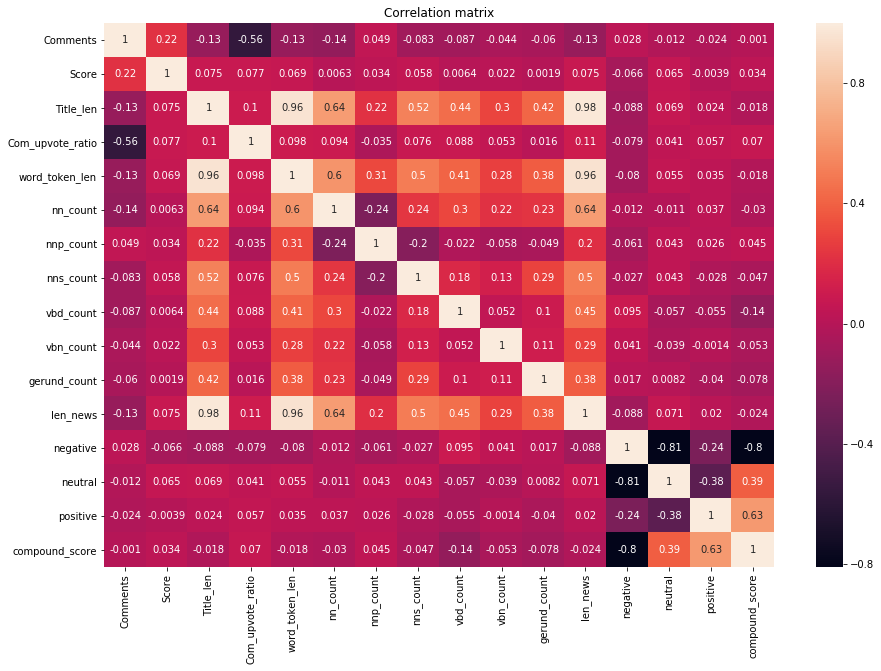

In [29]:
plt.figure(figsize=(15, 10))
corr_map = df_corr.corr(method='pearson')
sns.heatmap(corr_map, annot=True)
plt.title('Correlation matrix')

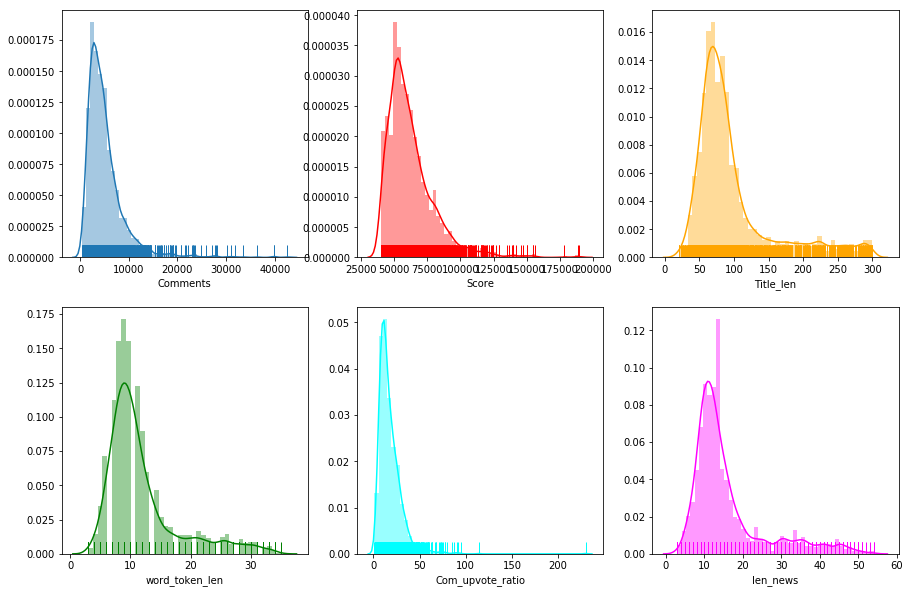

In [30]:
#Plotting parameters 
fig, ax = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(15)

#Distribution of the features 
sns.distplot(df['Comments'], rug=True, ax=ax[0,0])
sns.distplot(df['Score'], rug=True, color="red", ax=ax[0,1])
sns.distplot(df['Title_len'], rug=True, color="orange",ax=ax[0,2])
sns.distplot(df['word_token_len'], rug=True, color="green",ax=ax[1,0])
sns.distplot(df['Com_upvote_ratio'], rug=True, color="cyan",ax=ax[1,1])
sns.distplot(df['len_news'], rug=True, color="magenta",ax=ax[1,2])

In [31]:
#What is the skewness of each feature plotted? 
from scipy.stats import skew

column_names = [name for name in df.columns if name != "Title"]

for names in column_names:
    print("-" * 50)
    print("Skewness of {} : {}".format(names, skew(df[names])))

--------------------------------------------------
Skewness of Comments : 3.2339108609734404
--------------------------------------------------
Skewness of Score : 1.9581264700573353
--------------------------------------------------
Skewness of Title_len : 1.7879517018860291
--------------------------------------------------
Skewness of Com_upvote_ratio : 3.8668202470965705
--------------------------------------------------
Skewness of word_token_len : 1.6823857230958428
--------------------------------------------------
Skewness of nn_count : 1.1502855464924693
--------------------------------------------------
Skewness of nnp_count : 1.445751133806052
--------------------------------------------------
Skewness of nns_count : 1.5962726079403577
--------------------------------------------------
Skewness of vbd_count : 1.405014153702052
--------------------------------------------------
Skewness of vbn_count : 3.2132011947291916
--------------------------------------------------
Skewn

**Box-Cox transformation will have to be applied to normalize the distributions of the features**

### WordCloud to represent the most appearing words in all the news titles

In [32]:
#Wordcloud creation 
import re
bag_of_words = []

for i in range(len(df)):
    splits = df['Title'][i].split()
    for j in range(len(splits)):
        bag_of_words.append(splits[j])

In [33]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image 

# world_mask = np.array(Image.open("C:\\Users\\SI-SaureyjVerma\\Desktop\\world.png"))

bag_of_words
#Adding stopwords to remove them from the wordcloud 
stopwords = set(STOPWORDS)
stopwords.add("says")
stopwords.add("say")
stopwords.add("will")
stopwords.add("new")
wordcloud = WordCloud(width=1000, height=1000, margin=0, stopwords=stopwords).generate(" ".join(bag_of_words))

(-0.5, 999.5, 999.5, -0.5)

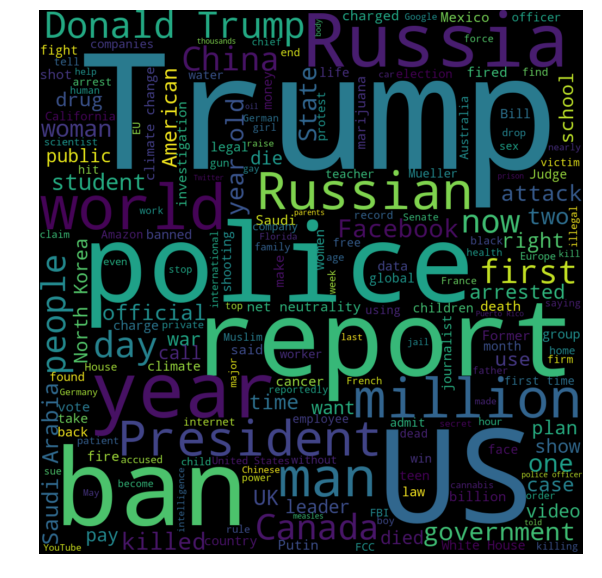

In [34]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [36]:
corr_map

,Comments,Score,Title_len,Com_upvote_ratio,word_token_len,nn_count,nnp_count,nns_count,vbd_count,vbn_count,gerund_count,len_news,negative,neutral,positive,compound_score
Comments,1.000000,0.215263,-0.127118,-0.563697,-0.131288,-0.143591,0.049217,-0.082982,-0.087216,-0.043778,-0.060040,-0.131019,0.027720,-0.011672,-0.024414,-0.000998
Score,0.215263,1.000000,0.075380,0.076709,0.069256,0.006300,0.033965,0.058093,0.006395,0.022087,0.001856,0.075437,-0.066016,0.065313,-0.003931,0.033928
Title_len,-0.127118,0.075380,1.000000,0.101013,0.964304,0.635306,0.216158,0.520866,0.444807,0.295579,0.416616,0.983131,-0.088293,0.069392,0.024370,-0.018284
Com_upvote_ratio,-0.563697,0.076709,0.101013,1.000000,0.098316,0.093881,-0.035082,0.076497,0.087781,0.053073,0.016015,0.105821,-0.079268,0.041420,0.056591,0.070302
word_token_len,-0.131288,0.069256,0.964304,0.098316,1.000000,0.602460,0.310786,0.502423,0.409802,0.277892,0.384501,0.956338,-0.080054,0.054965,0.035250,-0.018173
nn_count,-0.143591,0.006300,0.635306,0.093881,0.602460,1.000000,-0.236454,0.236587,0.303955,0.221417,0.230433,0.635006,-0.012274,-0.010699,0.036982,-0.030087
nnp_count,0.049217,0.033965,0.216158,-0.035082,0.310786,-0.236454,1.000000,-0.198999,-0.021891,-0.057946,-0.048542,0.204127,-0.061491,0.042890,0.026175,0.044618
nns_count,-0.082982,0.058093,0.520866,0.076497,0.502423,0.236587,-0.198999,1.000000,0.178911,0.125820,0.289679,0.498995,-0.027343,0.042944,-0.028195,-0.047331
vbd_count,-0.087216,0.006395,0.444807,0.087781,0.409802,0.303955,-0.021891,0.178911,1.000000,0.052331,0.099870,0.451440,0.094735,-0.057409,-0.054571,-0.144634
vbn_count,-0.043778,0.022087,0.295579,0.053073,0.277892,0.221417,-0.057946,0.125820,0.052331,1.000000,0.113492,0.292083,0.041364,-0.038612,-0.001408,-0.052965


**IS the correlation between the sentiment score and compound score significant?**

To calculate the significance of the correlation, the following [test statistic](http://www.opentextbooks.org.hk/ditatopic/9498) will be used

$$t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}}$$

In [37]:
def corr_test(r):
    t = (r * np.sqrt(len(df) - 2)) / np.sqrt(1 - r**2)
    print("-" * 40)
    print("Statistic obtained: {}".format(t))
    


pos_corr = np.corrcoef(df['positive'], df['compound_score'])[1, 0]
neg_corr = np.corrcoef(df['negative'], df['compound_score'])[1, 0]
neu_corr = np.corrcoef(df['neutral'], df['compound_score'])[1, 0]

correls = [pos_corr, neg_corr, neu_corr]
for r in correls:
    corr_test(r)

----------------------------------------
Statistic obtained: 35.72998846596316
----------------------------------------
Statistic obtained: -60.420406098720264
----------------------------------------
Statistic obtained: 18.894720294917246


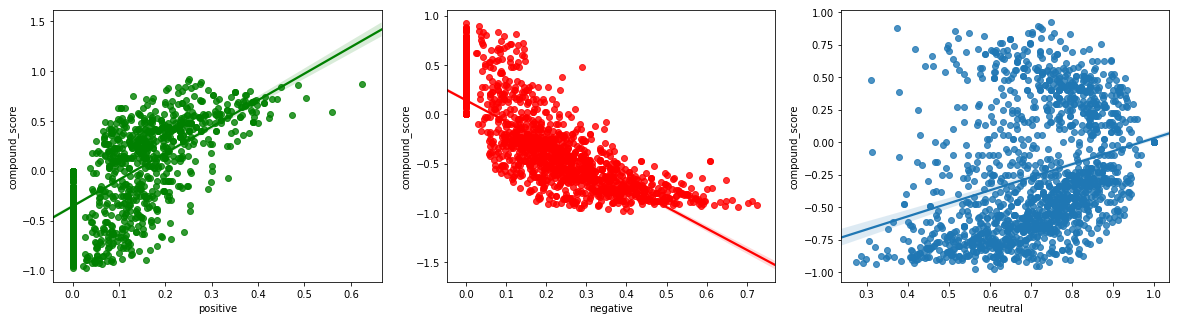

In [38]:
fig, ax = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(20)

sns.regplot(df["positive"], df["compound_score"], ax=ax[0], color="green")
sns.regplot(df["negative"], df["compound_score"], ax=ax[1], color="red")
sns.regplot(df["neutral"], df["compound_score"], ax=ax[2])

#Log transformation will fix the discrete datapoint problem 

A good chunk of the news was scored at a **neutral** compound score, with the second highest compound score category belonging to **negative** news, and the last one being **positive** news.

Text(0.5, 1.0, 'Sentiment Distribution')

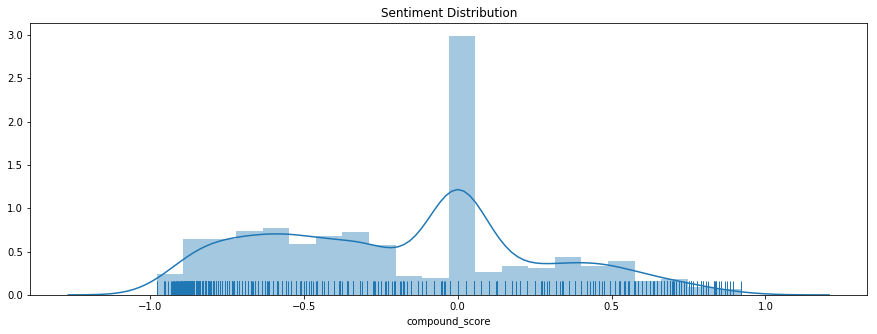

In [39]:
plt.figure(figsize=(15, 5))
sns.distplot(df.compound_score, rug=True)
plt.title("Sentiment Distribution")

What properties do neutral, positive and negative compound score news have in them?

Text(0.5, 1.0, 'Multi distribution of negative and positive news')

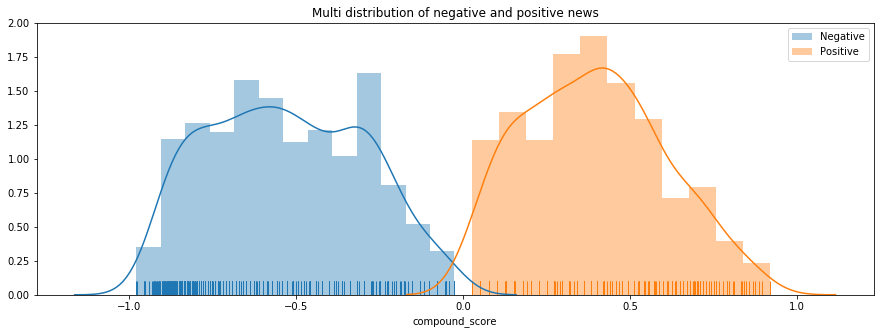

In [40]:
df_negative = df[df["compound_score"] < 0]
df_neutral = df[df["compound_score"] ==0]
df_positive = df[df["compound_score"] > 0]

plt.figure(figsize=(15, 5))
sns.distplot(df_negative.compound_score, rug=True, label="Negative")
sns.distplot(df_positive.compound_score, rug=True, label="Positive")
plt.legend(loc="best")
plt.title("Multi distribution of negative and positive news")

The distributions show that some of the negative news overlap toward the orange distribution of positive news, and some of the news of positive news overlaps towards the negative news. 

**What is the correlation property for each news type and can a specific pattern be observed in them?**

In [41]:
df_positive = df_positive.drop(['Title'], axis=1)
df_negative = df_negative.drop(['Title'], axis=1)
df_neutral = df_neutral.drop(['Title'], axis=1)

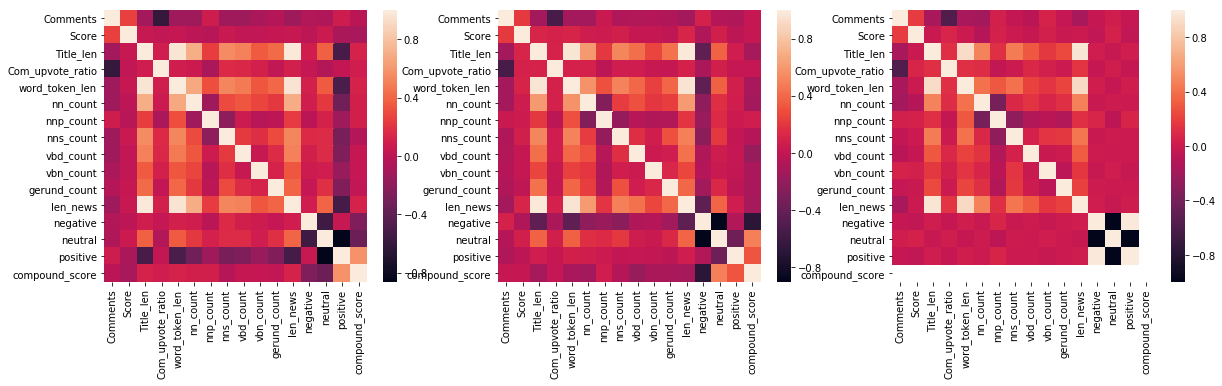

In [42]:
fig, ax = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(20)


sns.heatmap(df_positive.corr(), ax=ax[0])
sns.heatmap(df_negative.corr(), ax=ax[1])
sns.heatmap(df_neutral.corr(), ax=ax[2])

I suspect there to be a confounding effect in some of the correlations, such as the correlation of **Title_len** being with **neutral score**, and the neutral score's correlation with the **compound score**. Such hidden correlations can lead to misleading results since the confounding effects can disrupt the actual correlation between the two intended variables. 

To see how the correlation changes when one of the variables is controlled, a partial correlation function will have to be made.

In [43]:
df.corr()

,Comments,Score,Title_len,Com_upvote_ratio,word_token_len,nn_count,nnp_count,nns_count,vbd_count,vbn_count,gerund_count,len_news,negative,neutral,positive,compound_score
Comments,1.000000,0.215263,-0.127118,-0.563697,-0.131288,-0.143591,0.049217,-0.082982,-0.087216,-0.043778,-0.060040,-0.131019,0.027720,-0.011672,-0.024414,-0.000998
Score,0.215263,1.000000,0.075380,0.076709,0.069256,0.006300,0.033965,0.058093,0.006395,0.022087,0.001856,0.075437,-0.066016,0.065313,-0.003931,0.033928
Title_len,-0.127118,0.075380,1.000000,0.101013,0.964304,0.635306,0.216158,0.520866,0.444807,0.295579,0.416616,0.983131,-0.088293,0.069392,0.024370,-0.018284
Com_upvote_ratio,-0.563697,0.076709,0.101013,1.000000,0.098316,0.093881,-0.035082,0.076497,0.087781,0.053073,0.016015,0.105821,-0.079268,0.041420,0.056591,0.070302
word_token_len,-0.131288,0.069256,0.964304,0.098316,1.000000,0.602460,0.310786,0.502423,0.409802,0.277892,0.384501,0.956338,-0.080054,0.054965,0.035250,-0.018173
nn_count,-0.143591,0.006300,0.635306,0.093881,0.602460,1.000000,-0.236454,0.236587,0.303955,0.221417,0.230433,0.635006,-0.012274,-0.010699,0.036982,-0.030087
nnp_count,0.049217,0.033965,0.216158,-0.035082,0.310786,-0.236454,1.000000,-0.198999,-0.021891,-0.057946,-0.048542,0.204127,-0.061491,0.042890,0.026175,0.044618
nns_count,-0.082982,0.058093,0.520866,0.076497,0.502423,0.236587,-0.198999,1.000000,0.178911,0.125820,0.289679,0.498995,-0.027343,0.042944,-0.028195,-0.047331
vbd_count,-0.087216,0.006395,0.444807,0.087781,0.409802,0.303955,-0.021891,0.178911,1.000000,0.052331,0.099870,0.451440,0.094735,-0.057409,-0.054571,-0.144634
vbn_count,-0.043778,0.022087,0.295579,0.053073,0.277892,0.221417,-0.057946,0.125820,0.052331,1.000000,0.113492,0.292083,0.041364,-0.038612,-0.001408,-0.052965


In [44]:
#Partial Correlation function 
def partial_correl(a, b, c):
    
    numerator = np.corrcoef(a, b)[0,1] - (np.corrcoef(a, c)[0,1] * np.corrcoef(c, b)[0,1])
    denominator = np.sqrt(1 - np.corrcoef(a, c)[0,1] **2) * np.sqrt(1 - np.corrcoef(c, b)[0,1] ** 2)
    partial_corr = numerator / denominator
    print("Partial Correlation: {}".format(partial_corr))

In [45]:
#Partial correlation between positive and compound_score, the effect of title length suppressed (For positive news)
partial_correl(df_positive.positive, df_positive.compound_score, df_positive.Title_len)

Partial Correlation: 0.7532242639539217


In [46]:
#Partial correlation between negative and compound_score, the effect of title length suppresed (For negative news)
partial_correl(df_positive.negative, df_positive.compound_score, df_positive.Title_len)

Partial Correlation: -0.2783949858338804


Turns out that for positive news, the title length was confounding the true relationship between the compound score of the news and the neutrality of the news by reducing the correlation impact between them.

**Before testing for partial correlation**, the inference being deduced was that *As the Title length increases, the news becomes less positive, and with the positive score decreasing, the compound_score decreased due to a positive correlation between the two, hence the increase in the length of the news must be having an impact on the compound score of the news*

**After testing for partial correlation**, the partial correlation clearly shows that with the title length removed, the actual correlation between the positivity of the news and the compound score is much stronger than the original correlation, signifying that with the presence of title length the actual effect is suppressed and reduced to the point that the effect seems weaker.

**How does the relation change between news positivity and its compound score when the neutrality effect is suppressed?**

In [167]:
partial_correl(df.positive, df.compound_score, df.neutral)

Partial Correlation: 0.9049866022536922


**How does the relation change between news negativity and its compound score when the neutrality effect is suppressed?**

In [168]:
partial_correl(df.negative, df.compound_score, df.neutral)

Partial Correlation: -0.9049196663390815


**Point of inference to be noted:** The actual impact of news positivity and negativity on the actual compound score is affected by the presence of neutrality in the news and logically it makes sense. Public opinions about a specific news range between positive and negative scales but a small amount of *mixed opinions* are also present in opinions, which themselves act as a neutral behaviour, cushioning the actual impact of positive/negative sentiment on the news's compound score.

**What has to be done with this information**: Knowing that the effect of neutrality is there on the compound score, two types of regression models will have to be built to see which one yields a more significant performance over the other. 

Let's test that using Statsmodels.

In [49]:
#Dataframe to be used for regression analysis 
df_reg = df.drop(["Title"], axis=1)

#Partitions 
y = df_reg["compound_score"]
x = df_reg.drop(["compound_score"], axis=1)
x_interaction = df_reg.drop(["compound_score","neutral"],axis=1)

**Regression model with *neutral* included**

In [52]:
import statsmodels.api as sm 

model_noint = sm.OLS(y, x).fit()
print(model_noint.summary())

                            OLS Regression Results                            
Dep. Variable:         compound_score   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     960.0
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        11:54:32   Log-Likelihood:                 781.43
No. Observations:                1993   AIC:                            -1533.
Df Residuals:                    1978   BIC:                            -1449.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Comments          2.959e-06   1.16e-06  

**Regression model with *neutral* excluded**

In [53]:
model_int = sm.OLS(y, x_interaction).fit()
print(model_int.summary())

                            OLS Regression Results                            
Dep. Variable:         compound_score   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     1027.
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        12:02:59   Log-Likelihood:                 779.78
No. Observations:                1993   AIC:                            -1532.
Df Residuals:                    1979   BIC:                            -1453.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Comments          3.673e-06   1.09e-06  

Removing *neutral* from the model does not impact the coefficient of determination in any way, meaning that in the actual regression model, inclusion or exclusion of the neutral feature does not impact the power of the estimator in any great degree. But looking at the R-squared score, it seems that multicollinearity might be present in the data. Is this true?

In [55]:
def vif(r_squared):
    vif = 1 / (1 - r_squared)
    print("Variance Inflation Factor: {}".format(vif))
    
    
vif(0.878)

Variance Inflation Factor: 8.19672131147541


The VIF here seems to be quite high, but also note that the data has not been engineered to tailor to the Gauss-Markov assumptions, hence the VIF will be tested again after the assumptions have been fulfilled.


Let's observe the residual plot

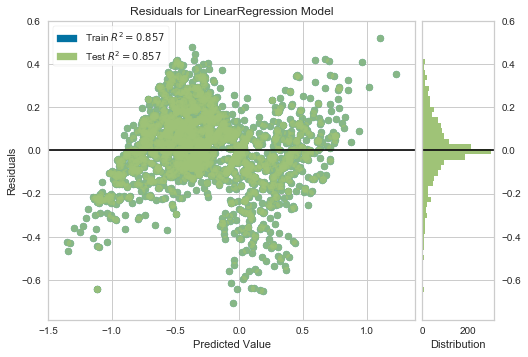

In [113]:
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

lr = LinearRegression()
viz = ResidualsPlot(lr)

viz.fit(x, y)
viz.score(x, y)
viz.poof()

Some trace of non-constant error variance. Will have to fix this also.

### Sentiment Analysis of news from 2014 to 2019 

Let's analyze the sentiment of the news from 2014 to 2019 using some time series analysis

c:\users\si-saureyjverma\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


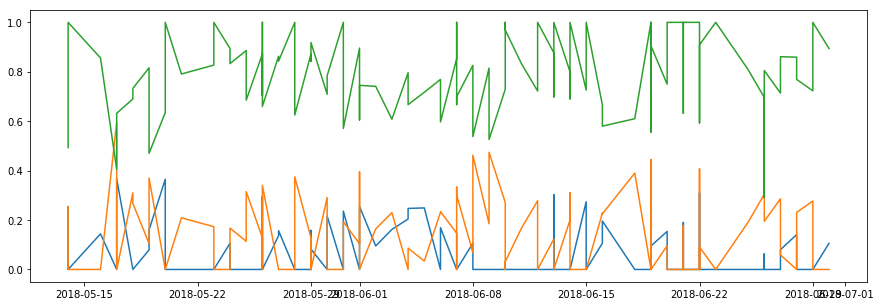

In [56]:
# fig, ax = plt.subplots(3, 1)
# fig.set_figheight(15)
# fig.set_figwidth(20)

plt.figure(figsize=(15,5))
plt.plot(df['positive'][1000:1100])
plt.plot(df['negative'][1000:1100])
plt.plot(df['neutral'][1000:1100])

Looks quite jittery and unsmoothed. Lets smoothen them using exponential smoothing to find the exponential moving average.

In [70]:
df_positive_exp = df["positive"].ewm(span=10).mean()
df_negative_exp = df["negative"].ewm(span=10).mean()
df_neutral_exp = df["neutral"].ewm(span=10).mean()

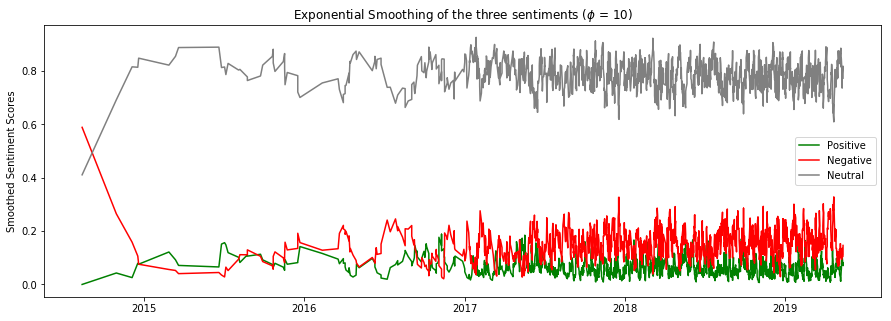

In [98]:
plt.figure(figsize=(15, 5))

plt.plot(df_positive_exp, color="green", label="Positive")
plt.plot(df_negative_exp, color="red", label="Negative")
plt.plot(df_neutral_exp, color="grey", label="Neutral")
plt.ylabel("Smoothed Sentiment Scores")
plt.title("Exponential Smoothing of the three sentiments ($\phi$ = 10)")
plt.legend(loc="best")

In [100]:
df.head(2)

,Title,Comments,Score,Title_len,Com_upvote_ratio,word_token_len,nn_count,nnp_count,nns_count,vbd_count,vbn_count,gerund_count,len_news,negative,neutral,positive,compound_score
Time,,,,,,,,,,,,,,,,,
2014-08-12,Robin Williams found Dead,4750,43394,25,9.135579,4,0,3,0,1,0,0,4,0.589,0.411,0.000,-0.6486
2014-10-29,Costco will again stay closed on Thanksgiving ...,4147,57265,230,13.808777,21,4,1,4,1,0,3,34,0.000,0.922,0.078,0.4215


In [121]:
np.sort(df.len_news)

array([ 3,  3,  3, ..., 53, 54, 54], dtype=int64)